In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from imblearn.under_sampling import RandomUnderSampler
import shutil

In [3]:
#Membaca file csv
file_path = 'D:\Tugas Akhir\Stroke\healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path)
# Menampilkan jumlah data awal dataset sebelum diubah
jumlah_data_awal = df.shape[0]
print("Jumlah data awal sebelum perubahan:", jumlah_data_awal)
df = df.drop('id', axis=1)
df.head()

Jumlah data awal sebelum perubahan: 5110


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


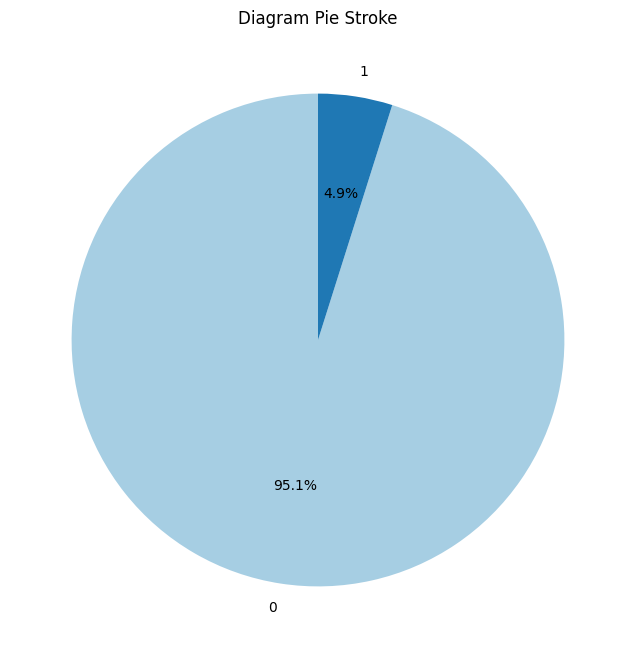

In [4]:
# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df['stroke'].value_counts()

# Plotting diagram pie untuk kolom 'stroke'
plt.figure(figsize=(8, 8))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Berikan judul
plt.title('Diagram Pie Stroke')

# Tampilkan diagram
plt.show()

In [5]:
print(df.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [6]:
# Menghapus baris dengan nilai 'other' pada kolom 'age'
df = df[df['gender'] != 'Other']

# Menghapus baris dengan nilai 'children' atau 'Never_worked' pada kolom 'work_type'
df = df[~df['work_type'].isin(['children', 'Never_worked'])]

# Menghapus baris dengan nilai bmi lebih dari 60 dan usia kurang dari 25
df = df[(df['bmi'] <= 60) & (df['age'] >= 25)]
jumlah_data_akhir = df.shape[0]
print("Jumlah data akhir setelah perubahan:", jumlah_data_akhir)
df.head()

Jumlah data akhir setelah perubahan: 3689


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


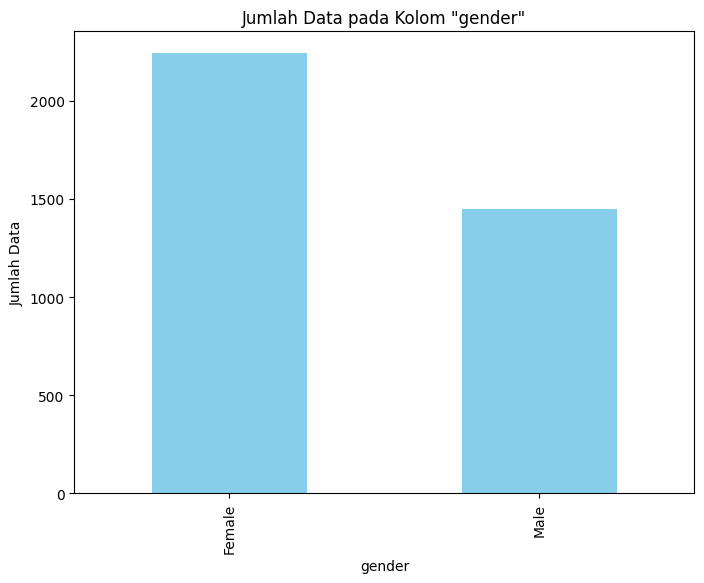

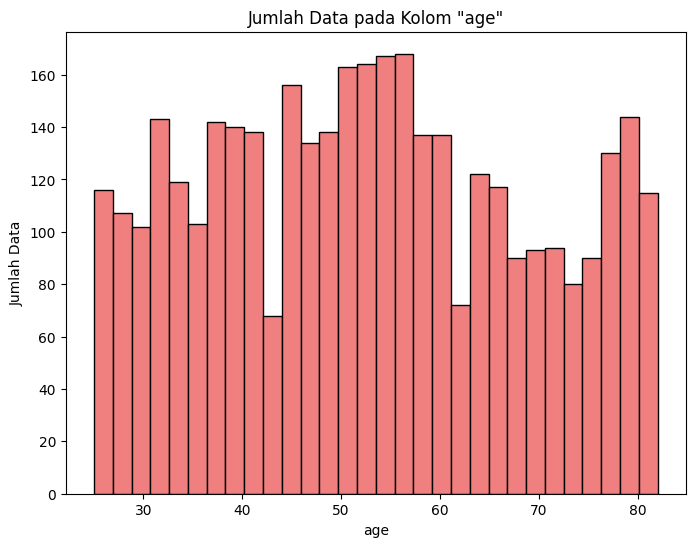

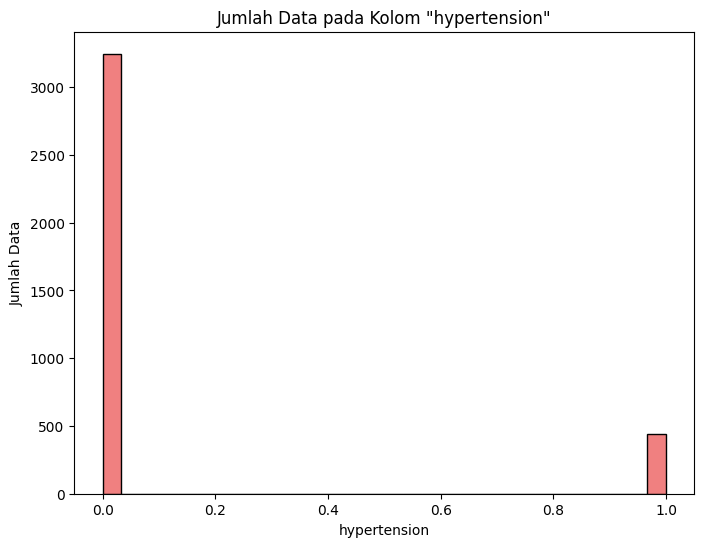

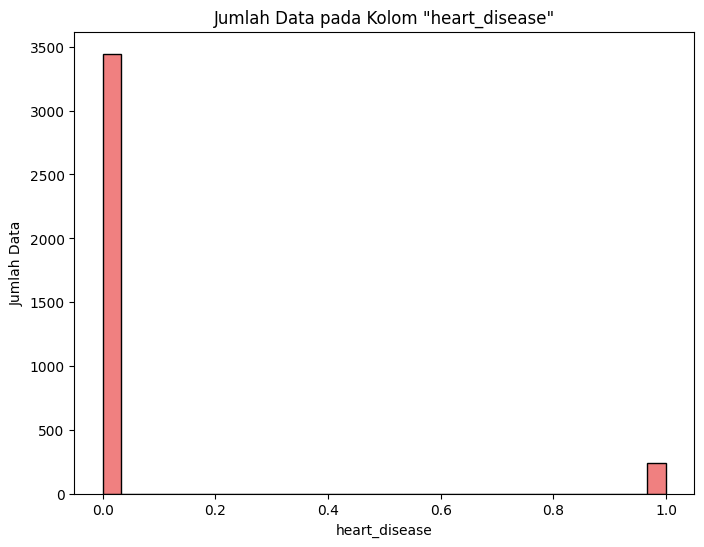

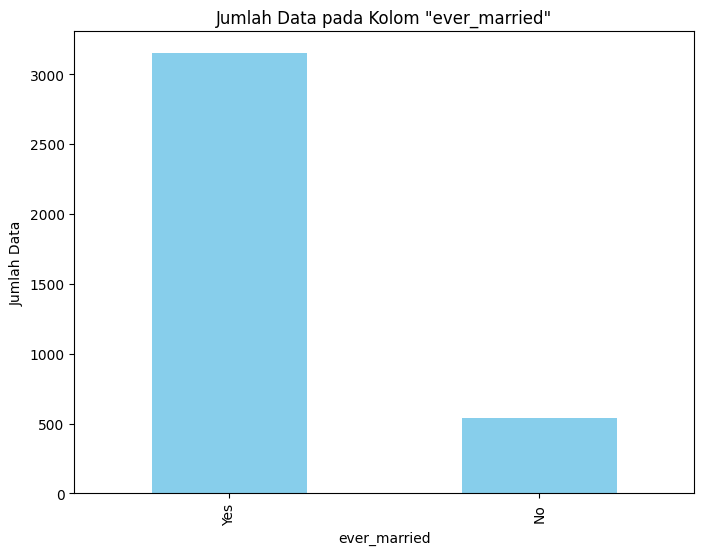

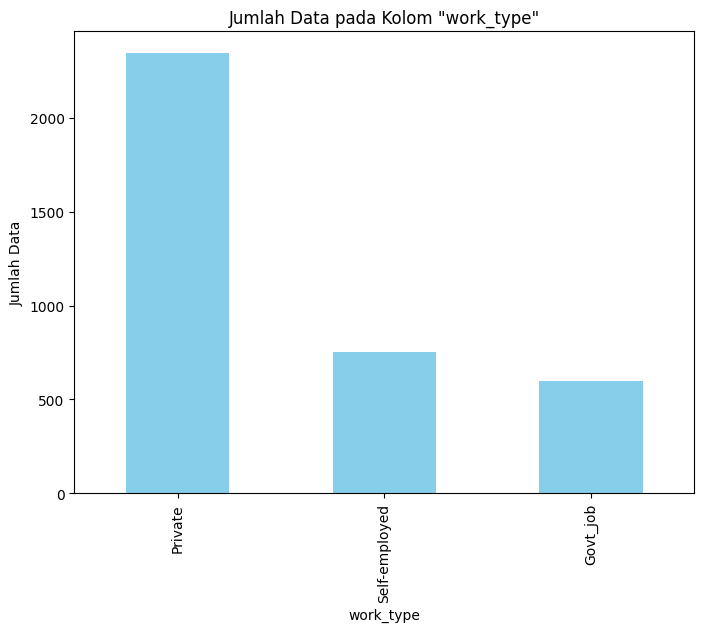

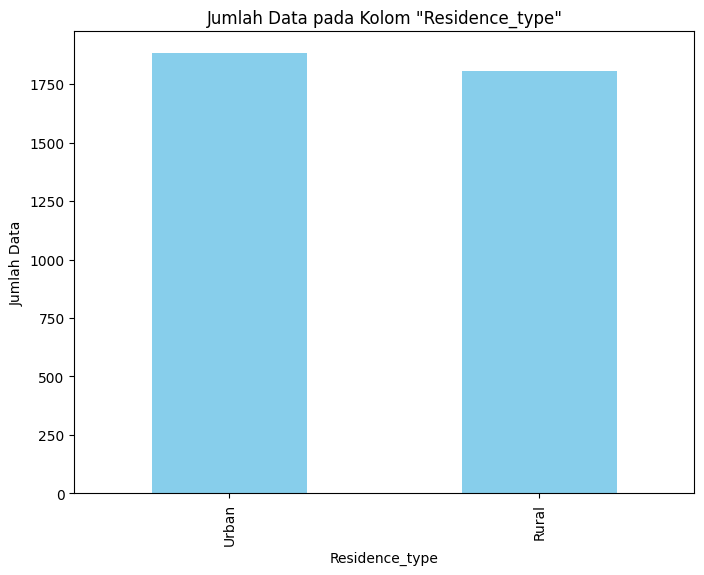

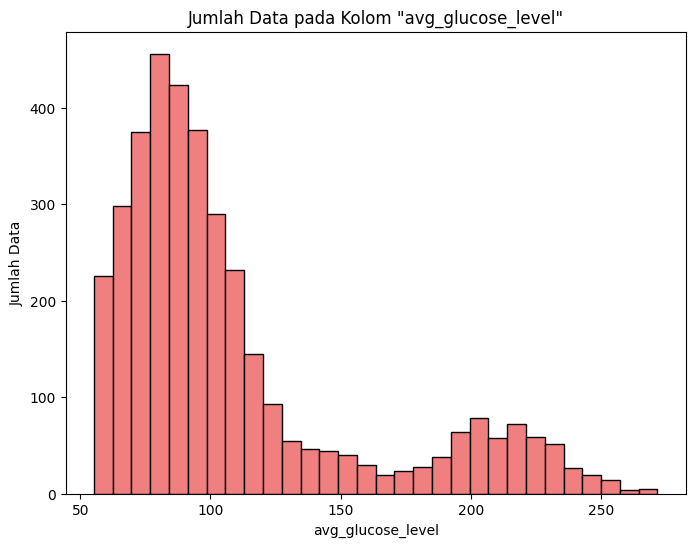

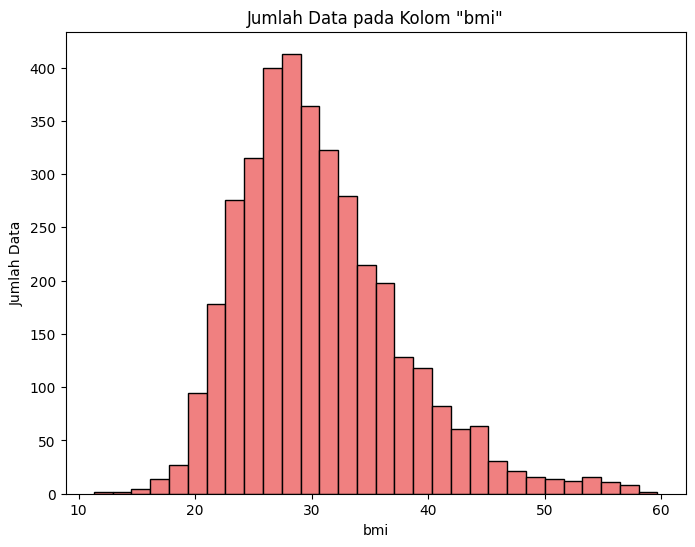

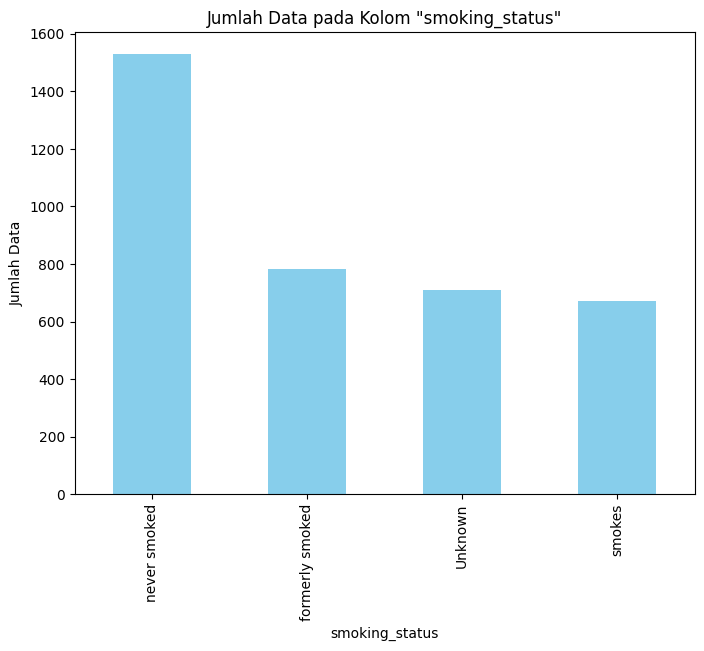

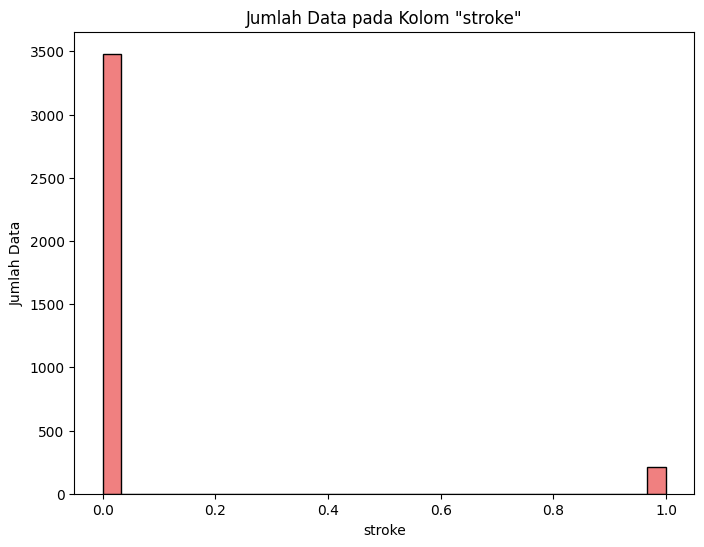

In [7]:
# Memilih kolom-kolom yang ingin diplot
selected_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                     'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

# Menampilkan diagram batang untuk setiap kolom yang dipilih
for column in selected_columns:
    plt.figure(figsize=(8, 6))
    
    if df[column].dtype == 'object':
        df[column].value_counts().plot(kind='bar', color='skyblue')
    else:
        plt.hist(df[column], bins=30, color='lightcoral', edgecolor='black')

    plt.title(f'Jumlah Data pada Kolom "{column}"')
    plt.xlabel(column)
    plt.ylabel('Jumlah Data')

    plt.show()

<Axes: >

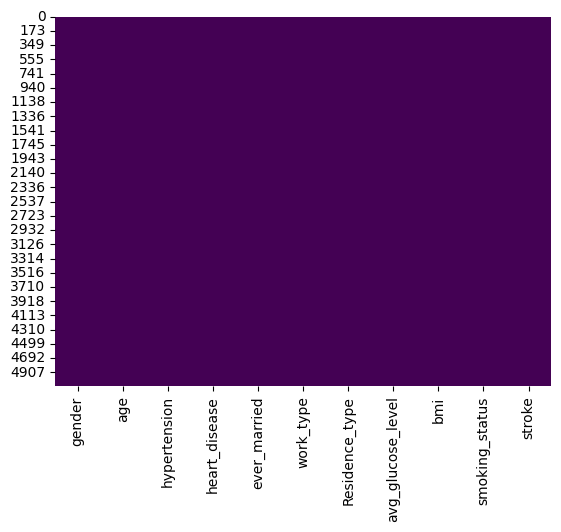

In [8]:
#Membaca missing values dengan menggunakan heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [9]:
print(df['gender'].value_counts())
# Mengganti label 'male' menjadi 0 dan 'female' menjadi 1 pada kolom 'gender'
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})

# Menampilkan lima baris pertama dari dataframe setelah perubahan
print("\nData setelah perubahan:")
print(df.head())

gender
Female    2242
Male      1447
Name: count, dtype: int64

Data setelah perubahan:
   gender   age  hypertension  heart_disease ever_married      work_type  \
0       0  67.0             0              1          Yes        Private   
2       0  80.0             0              1          Yes        Private   
3       1  49.0             0              0          Yes        Private   
4       1  79.0             1              0          Yes  Self-employed   
5       0  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  
5          Urban             186.21  29.0  formerly smoked       1  


In [10]:
print(df['ever_married'].value_counts())
# Mengganti label 'Yes' menjadi 1 dan 'No' menjadi 0 pada kolom 'ever_married'
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})

# Menampilkan lima baris pertama dari dataframe setelah perubahan
print("\nData setelah perubahan:")
df

ever_married
Yes    3148
No      541
Name: count, dtype: int64

Data setelah perubahan:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,0,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,1,57.0,0,0,1,Private,Rural,77.93,21.7,never smoked,0
5106,1,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,1,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,0,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
print(df['Residence_type'].value_counts())
# Mengganti label 'Urban' dan 'Rural' menjadi 0 dan 1 pada kolom 'Residence_type'
df['Residence_type'] = df['Residence_type'].replace({'Urban': 0, 'Rural': 1})

# Menampilkan lima baris pertama dari dataframe setelah perubahan
print("\nData setelah perubahan:")
df

Residence_type
Urban    1881
Rural    1808
Name: count, dtype: int64

Data setelah perubahan:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,0,228.69,36.6,formerly smoked,1
2,0,80.0,0,1,1,Private,1,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,Private,0,171.23,34.4,smokes,1
4,1,79.0,1,0,1,Self-employed,1,174.12,24.0,never smoked,1
5,0,81.0,0,0,1,Private,0,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,1,57.0,0,0,1,Private,1,77.93,21.7,never smoked,0
5106,1,81.0,0,0,1,Self-employed,0,125.20,40.0,never smoked,0
5107,1,35.0,0,0,1,Self-employed,1,82.99,30.6,never smoked,0
5108,0,51.0,0,0,1,Private,1,166.29,25.6,formerly smoked,0


In [12]:
# One-hot encoding untuk kolom 'work_type'
x_work_type = df['work_type'].values.reshape(-1, 1)
encoder_work_type = OneHotEncoder(sparse_output=False)
x_work_type_encoded = encoder_work_type.fit_transform(x_work_type)
df_work_type_encoded = pd.DataFrame(x_work_type_encoded, columns=encoder_work_type.get_feature_names_out(['work_type']))
df_work_type_encoded


,work_type_Govt_job,work_type_Private,work_type_Self-employed
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
3684,0.0,1.0,0.0
3685,0.0,0.0,1.0
3686,0.0,0.0,1.0
3687,0.0,1.0,0.0


In [13]:
# One-hot encoding untuk kolom 'smoking_status'
x_smoking_status = df['smoking_status'].values.reshape(-1, 1)
encoder_smoking_status = OneHotEncoder(sparse_output=False)
x_smoking_status_encoded = encoder_smoking_status.fit_transform(x_smoking_status)
df_smoking_status_encoded = pd.DataFrame(x_smoking_status_encoded, columns=encoder_smoking_status.get_feature_names_out(['smoking_status']))
df_smoking_status_encoded

,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
3684,0.0,0.0,1.0,0.0
3685,0.0,0.0,1.0,0.0
3686,0.0,0.0,1.0,0.0
3687,0.0,1.0,0.0,0.0


In [14]:
# Reset index untuk kedua DataFrame hasil one-hot encoding
df_work_type_encoded.reset_index(drop=True, inplace=True)
df_smoking_status_encoded.reset_index(drop=True, inplace=True)
# Menggabungkan hasil one-hot encoding
df_encoded = pd.concat([df_work_type_encoded, df_smoking_status_encoded], axis=1)

# Reset index
df.reset_index(drop=True, inplace=True)
# Mendrop kolom 'work_type' dan 'smoking_status' dari DataFrame asli
df = pd.concat([df_encoded, df], axis=1).drop(['work_type', 'smoking_status'], axis=1)
# Menentukan urutan kolom sesuai kriteria
column_order = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
                'Residence_type', 'avg_glucose_level', 'bmi',
                'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes',
                'stroke']

# Mengurutkan kolom sesuai dengan urutan yang diinginkan
df = df[column_order]
df

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,67.0,0,1,1,0.0,1.0,0.0,0,228.69,36.6,0.0,1.0,0.0,0.0,1
1,0,80.0,0,1,1,0.0,1.0,0.0,1,105.92,32.5,0.0,0.0,1.0,0.0,1
2,1,49.0,0,0,1,0.0,1.0,0.0,0,171.23,34.4,0.0,0.0,0.0,1.0,1
3,1,79.0,1,0,1,0.0,0.0,1.0,1,174.12,24.0,0.0,0.0,1.0,0.0,1
4,0,81.0,0,0,1,0.0,1.0,0.0,0,186.21,29.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,1,57.0,0,0,1,0.0,1.0,0.0,1,77.93,21.7,0.0,0.0,1.0,0.0,0
3685,1,81.0,0,0,1,0.0,0.0,1.0,0,125.20,40.0,0.0,0.0,1.0,0.0,0
3686,1,35.0,0,0,1,0.0,0.0,1.0,1,82.99,30.6,0.0,0.0,1.0,0.0,0
3687,0,51.0,0,0,1,0.0,1.0,0.0,1,166.29,25.6,0.0,1.0,0.0,0.0,0


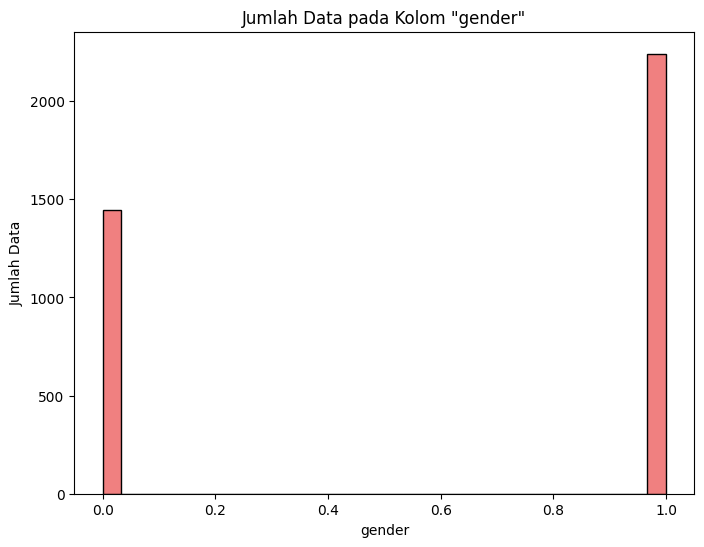

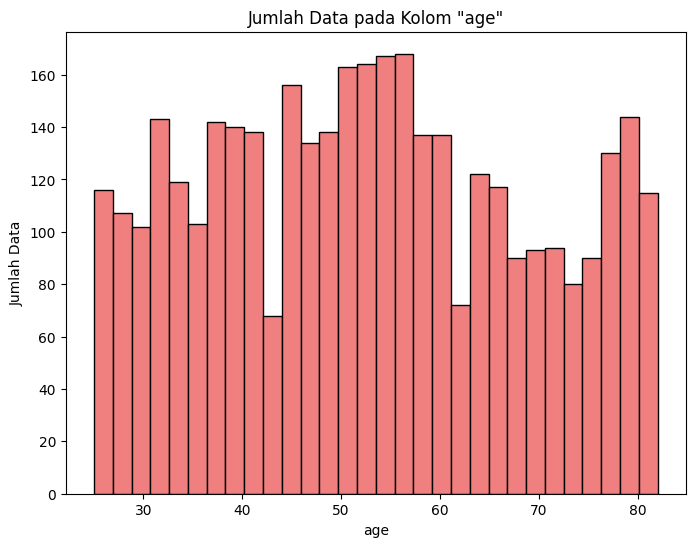

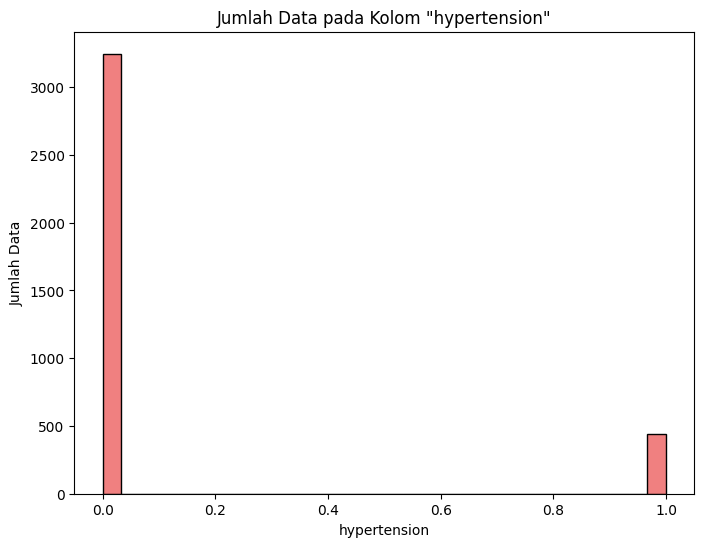

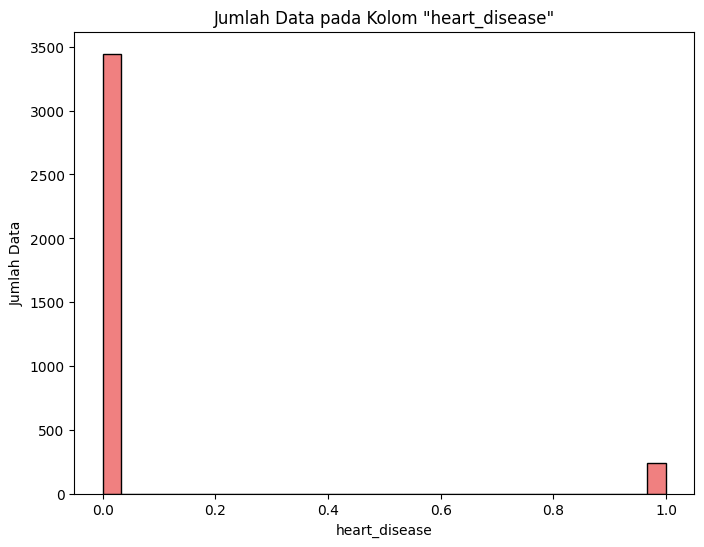

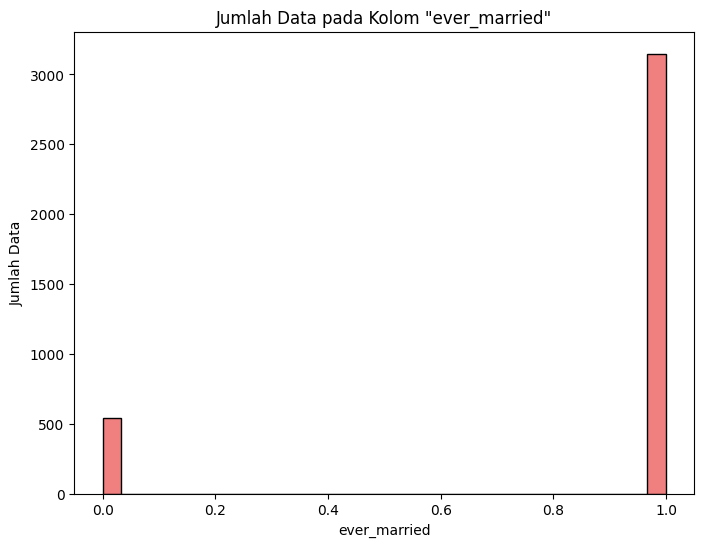

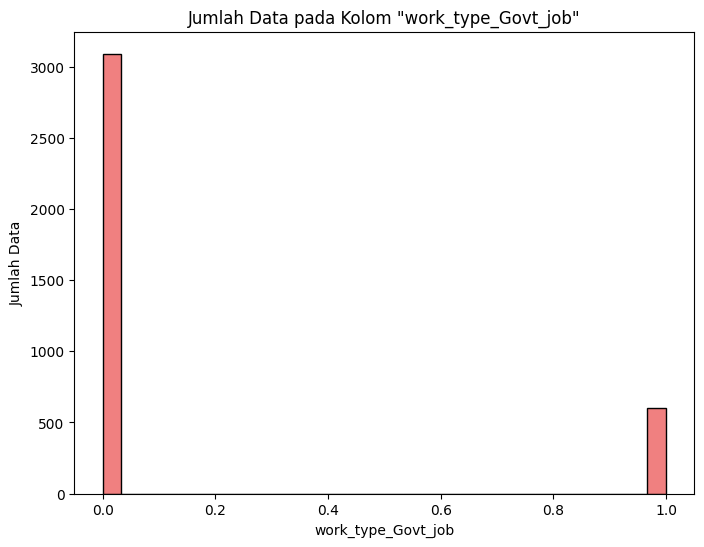

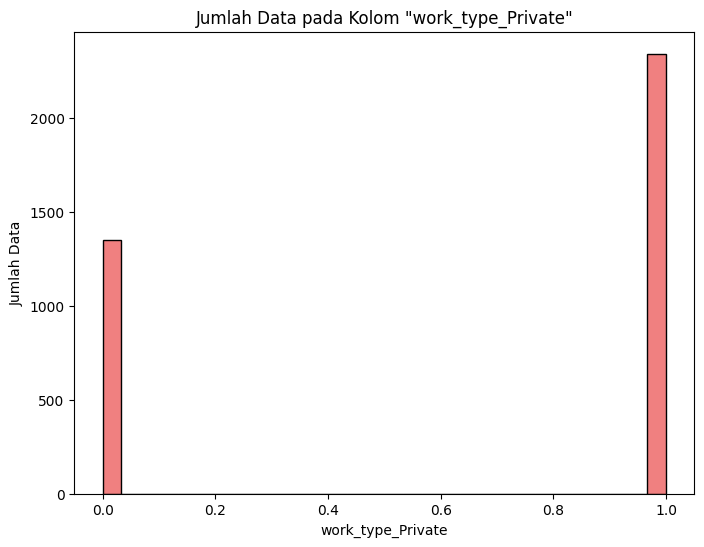

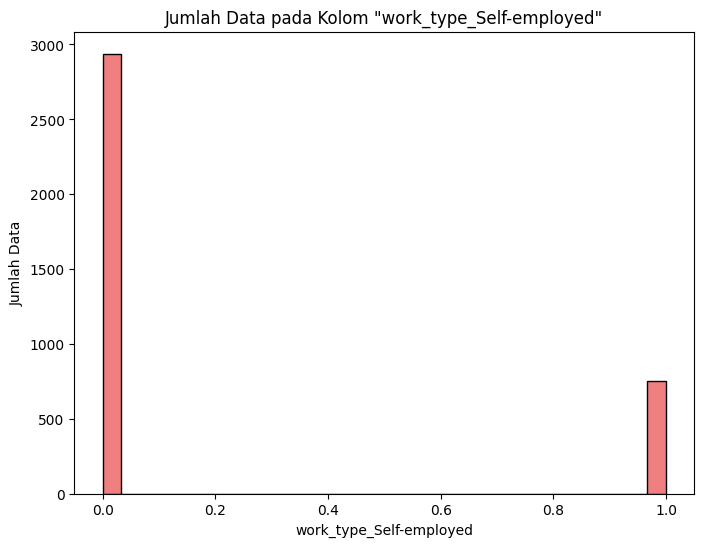

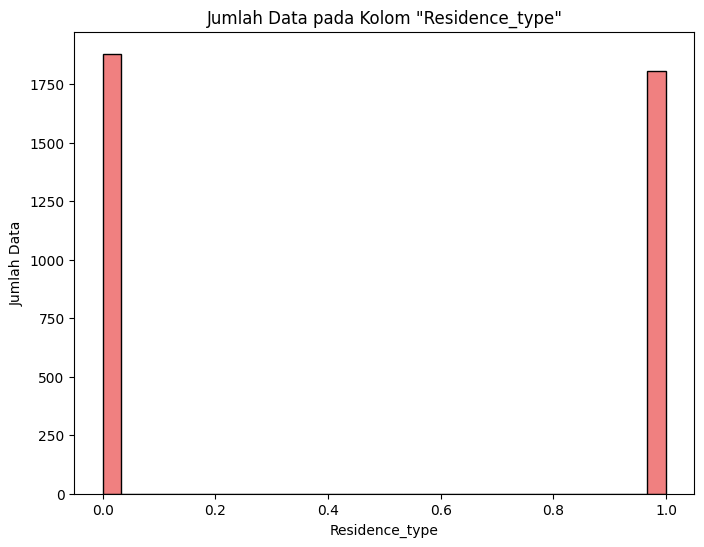

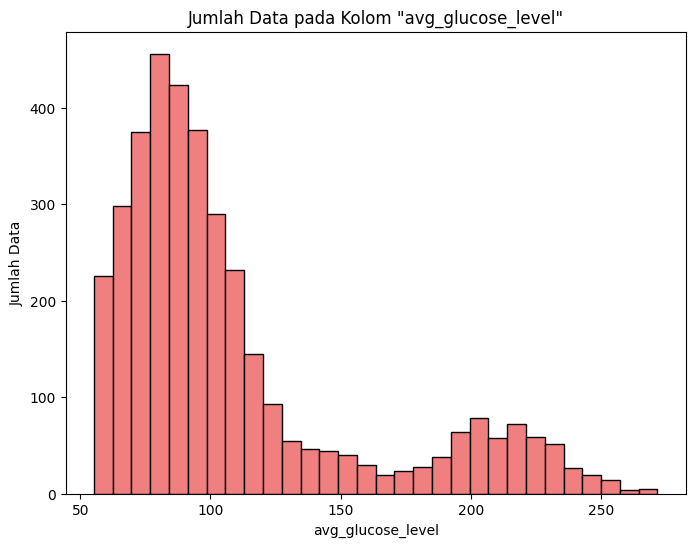

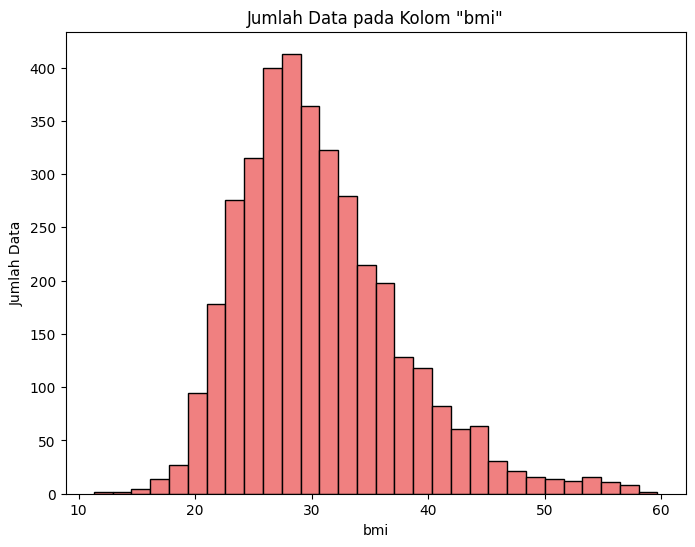

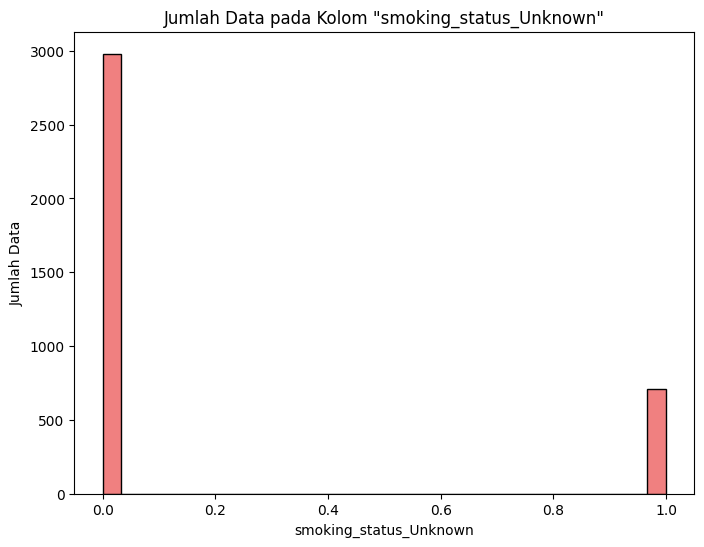

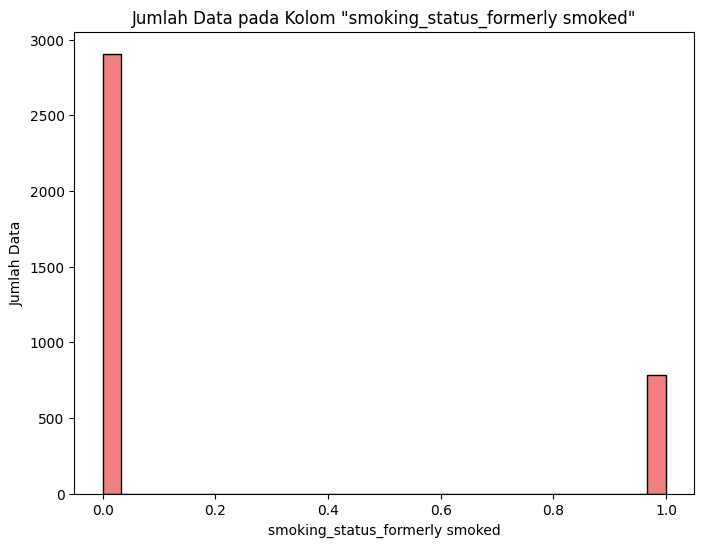

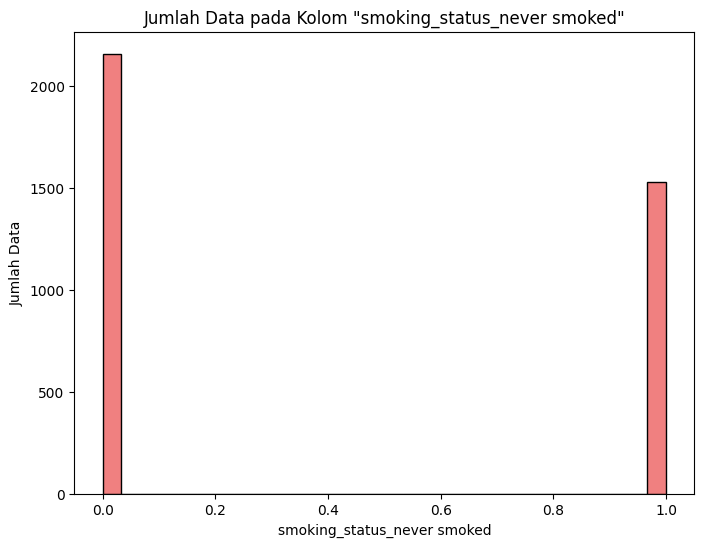

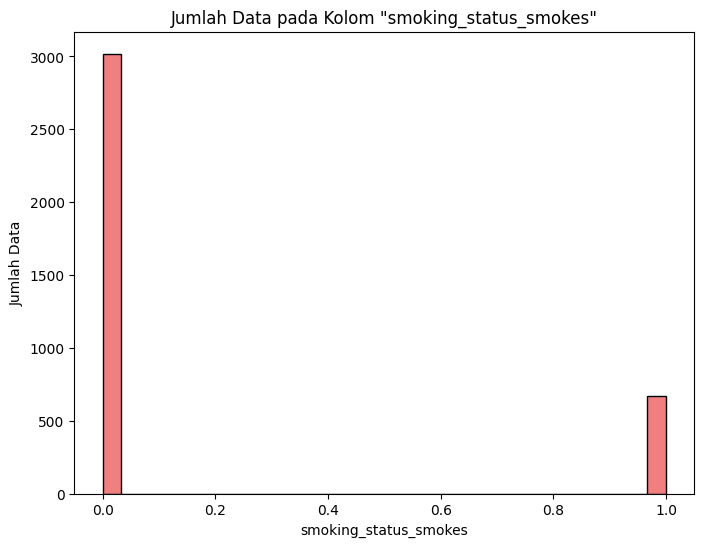

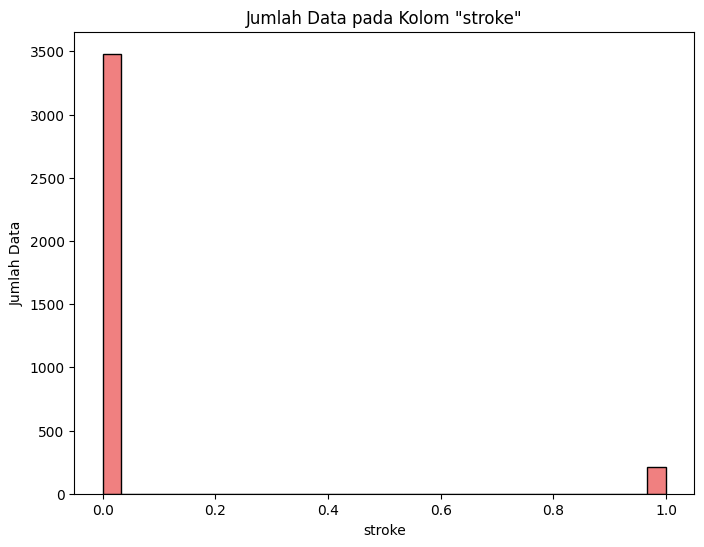

In [15]:
selected_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
                'Residence_type', 'avg_glucose_level', 'bmi',
                'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes',
                'stroke']

# Menampilkan diagram batang untuk setiap kolom yang dipilih
for column in selected_columns:
    plt.figure(figsize=(8, 6))
    
    if df[column].dtype == 'object':
        df[column].value_counts().plot(kind='bar', color='skyblue')
    else:
        plt.hist(df[column], bins=30, color='lightcoral', edgecolor='black')

    plt.title(f'Jumlah Data pada Kolom "{column}"')
    plt.xlabel(column)
    plt.ylabel('Jumlah Data')

    plt.show()

In [16]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,67.0,0,1,1,0.0,1.0,0.0,0,228.69,36.6,0.0,1.0,0.0,0.0,1
1,0,80.0,0,1,1,0.0,1.0,0.0,1,105.92,32.5,0.0,0.0,1.0,0.0,1
2,1,49.0,0,0,1,0.0,1.0,0.0,0,171.23,34.4,0.0,0.0,0.0,1.0,1
3,1,79.0,1,0,1,0.0,0.0,1.0,1,174.12,24.0,0.0,0.0,1.0,0.0,1
4,0,81.0,0,0,1,0.0,1.0,0.0,0,186.21,29.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,1,57.0,0,0,1,0.0,1.0,0.0,1,77.93,21.7,0.0,0.0,1.0,0.0,0
3685,1,81.0,0,0,1,0.0,0.0,1.0,0,125.20,40.0,0.0,0.0,1.0,0.0,0
3686,1,35.0,0,0,1,0.0,0.0,1.0,1,82.99,30.6,0.0,0.0,1.0,0.0,0
3687,0,51.0,0,0,1,0.0,1.0,0.0,1,166.29,25.6,0.0,1.0,0.0,0.0,0


In [17]:
print(df.dtypes)

gender                              int64
age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int64
work_type_Govt_job                float64
work_type_Private                 float64
work_type_Self-employed           float64
Residence_type                      int64
avg_glucose_level                 float64
bmi                               float64
smoking_status_Unknown            float64
smoking_status_formerly smoked    float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
stroke                              int64
dtype: object


In [18]:
for column in df.columns:
    if df[column].dtype == float and column not in ['avg_glucose_level', 'bmi', 'age']:
        df[column] = df[column].astype(int)

In [19]:
print(df.dtypes)

gender                              int64
age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int64
work_type_Govt_job                  int32
work_type_Private                   int32
work_type_Self-employed             int32
Residence_type                      int64
avg_glucose_level                 float64
bmi                               float64
smoking_status_Unknown              int32
smoking_status_formerly smoked      int32
smoking_status_never smoked         int32
smoking_status_smokes               int32
stroke                              int64
dtype: object


In [20]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,67.0,0,1,1,0,1,0,0,228.69,36.6,0,1,0,0,1
1,0,80.0,0,1,1,0,1,0,1,105.92,32.5,0,0,1,0,1
2,1,49.0,0,0,1,0,1,0,0,171.23,34.4,0,0,0,1,1
3,1,79.0,1,0,1,0,0,1,1,174.12,24.0,0,0,1,0,1
4,0,81.0,0,0,1,0,1,0,0,186.21,29.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,1,57.0,0,0,1,0,1,0,1,77.93,21.7,0,0,1,0,0
3685,1,81.0,0,0,1,0,0,1,0,125.20,40.0,0,0,1,0,0
3686,1,35.0,0,0,1,0,0,1,1,82.99,30.6,0,0,1,0,0
3687,0,51.0,0,0,1,0,1,0,1,166.29,25.6,0,1,0,0,0


In [62]:
# Menyimpan 12 data dengan stroke = 0 ke dalam CSV
df_stroke_0 = df[df['stroke'] == 0].head(12)
file_stroke_0 = 'D:\\Tugas Akhir\\Stroke\\data_stroke_0.csv'
df_stroke_0.to_csv(file_stroke_0, index=False, decimal=',')

# Menyimpan 3 data dengan stroke = 1 ke dalam CSV
df_stroke_1 = df[df['stroke'] == 1].head(3)
file_stroke_1 = 'D:\\Tugas Akhir\\Stroke\\data_stroke_1.csv'
df_stroke_1.to_csv(file_stroke_1, index=False, decimal=',')

print(f"Data dengan stroke = 0 telah disimpan dalam '{file_stroke_0}'")
print(f"Data dengan stroke = 1 telah disimpan dalam '{file_stroke_1}'")

Data dengan stroke = 0 telah disimpan dalam 'D:\Tugas Akhir\Stroke\data_stroke_0.csv'
Data dengan stroke = 1 telah disimpan dalam 'D:\Tugas Akhir\Stroke\data_stroke_1.csv'


In [63]:
df_stroke_0

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
208,0,58.0,1,0,1,0,1,0,0,87.96,39.2,0,0,1,0,0
209,1,70.0,0,0,1,0,1,0,1,69.04,35.9,0,1,0,0,0
210,1,47.0,0,0,1,0,1,0,0,210.95,50.1,1,0,0,0,0
211,1,52.0,0,0,1,0,1,0,0,77.59,17.7,0,1,0,0,0
212,1,75.0,0,1,1,0,0,1,1,243.53,27.0,0,0,1,0,0
213,1,32.0,0,0,1,0,1,0,1,77.67,32.3,0,0,0,1,0
214,1,74.0,1,0,1,0,0,1,0,205.84,54.6,0,0,1,0,0
215,1,79.0,0,0,1,1,0,0,0,77.08,35.0,1,0,0,0,0
216,0,79.0,0,1,1,0,1,0,0,57.08,22.0,0,1,0,0,0
217,1,37.0,0,0,1,0,1,0,1,162.96,39.4,0,0,1,0,0


In [21]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi Min-Max untuk kolom numerik tertentu
numeric_columns = ['age', 'avg_glucose_level', 'bmi']

scaler = MinMaxScaler()

# Membuat salinan DataFrame untuk disimpan setelah normalisasi
df_normalized = df.copy()

df_normalized[numeric_columns] = scaler.fit_transform(df_normalized[numeric_columns])

# Menampilkan DataFrame setelah normalisasi
print("DataFrame Setelah Normalisasi:")
print(df_normalized)


DataFrame Setelah Normalisasi:
      gender       age  hypertension  heart_disease  ever_married  \
0          0  0.736842             0              1             1   
1          0  0.964912             0              1             1   
2          1  0.421053             0              0             1   
3          1  0.947368             1              0             1   
4          0  0.982456             0              0             1   
...      ...       ...           ...            ...           ...   
3684       1  0.561404             0              0             1   
3685       1  0.982456             0              0             1   
3686       1  0.175439             0              0             1   
3687       0  0.456140             0              0             1   
3688       1  0.333333             0              0             1   

      work_type_Govt_job  work_type_Private  work_type_Self-employed  \
0                      0                  1                        0

In [22]:
df_normalized

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,0.736842,0,1,1,0,1,0,0,0.801173,0.522727,0,1,0,0,1
1,0,0.964912,0,1,1,0,1,0,1,0.234159,0.438017,0,0,1,0,1
2,1,0.421053,0,0,1,0,1,0,0,0.535793,0.477273,0,0,0,1,1
3,1,0.947368,1,0,1,0,0,1,1,0.549141,0.262397,0,0,1,0,1
4,0,0.982456,0,0,1,0,1,0,0,0.604979,0.365702,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,1,0.561404,0,0,1,0,1,0,1,0.104886,0.214876,0,0,1,0,0
3685,1,0.982456,0,0,1,0,0,1,0,0.323203,0.592975,0,0,1,0,0
3686,1,0.175439,0,0,1,0,0,1,1,0.128256,0.398760,0,0,1,0,0
3687,0,0.456140,0,0,1,0,1,0,1,0.512978,0.295455,0,1,0,0,0


In [23]:
# Mengganti koma dengan titik pada seluruh DataFrame
df_normalized.replace(',', '.', regex=True, inplace=True)
# Simpan DataFrame hasil normalisasi ke dalam file CSV dengan format desimal yang benar
hasil_normalisasi_file = 'hasil_setelah_normalisasi.csv'
df_normalized.to_csv(hasil_normalisasi_file, index=False, float_format='%.4f', decimal='.')

# Pindahkan file ke direktori yang diinginkan
tujuan_direktori = 'D:\\Tugas Akhir\\Stroke\\'
shutil.move(hasil_normalisasi_file, tujuan_direktori + hasil_normalisasi_file)
# Buat variabel untuk menampung hasil konversi yang dilimitasi koma sebanyak 4 desimal
hasil_konversi = df_normalized.round(4)

In [24]:
hasil_konversi

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,0.7368,0,1,1,0,1,0,0,0.8012,0.5227,0,1,0,0,1
1,0,0.9649,0,1,1,0,1,0,1,0.2342,0.4380,0,0,1,0,1
2,1,0.4211,0,0,1,0,1,0,0,0.5358,0.4773,0,0,0,1,1
3,1,0.9474,1,0,1,0,0,1,1,0.5491,0.2624,0,0,1,0,1
4,0,0.9825,0,0,1,0,1,0,0,0.6050,0.3657,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,1,0.5614,0,0,1,0,1,0,1,0.1049,0.2149,0,0,1,0,0
3685,1,0.9825,0,0,1,0,0,1,0,0.3232,0.5930,0,0,1,0,0
3686,1,0.1754,0,0,1,0,0,1,1,0.1283,0.3988,0,0,1,0,0
3687,0,0.4561,0,0,1,0,1,0,1,0.5130,0.2955,0,1,0,0,0


In [68]:
# x = hasil_konversi.drop('stroke', axis=1)
# y = hasil_konversi['stroke']

# X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

# X_train.assign(stroke=y_train).to_csv('data_train.csv', index=False, float_format='%.4f', decimal='.')
# X_test.assign(stroke=y_test).to_csv('data_test.csv', index=False, float_format='%.4f', decimal='.')
# # Pindahkan file CSV ke direktori tertentu (gunakan shutil)
# shutil.copyfile('data_train.csv', 'D:\Tugas Akhir\Stroke\data_train.csv')
# shutil.copyfile('data_test.csv', 'D:\Tugas Akhir\Stroke\data_test.csv')

'D:\\Tugas Akhir\\Stroke\\data_test.csv'

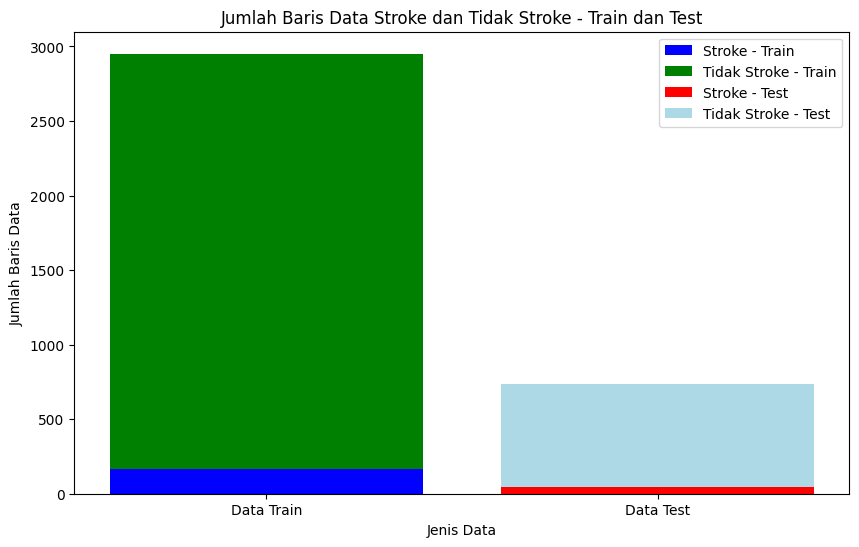

In [69]:
# # Baca data train dan test dari file CSV
# data_train = pd.read_csv('D:\\Tugas Akhir\\Stroke\\data_train.csv')
# data_test = pd.read_csv('D:\\Tugas Akhir\\Stroke\\data_test.csv')

# # Hitung jumlah stroke dan tidak stroke untuk data train
# train_stroke_counts = data_train['stroke'].value_counts()

# # Hitung jumlah stroke dan tidak stroke untuk data test
# test_stroke_counts = data_test['stroke'].value_counts()

# # Plotting diagram stacked bar untuk jumlah stroke dan tidak stroke
# plt.figure(figsize=(10, 6))

# # Bar untuk data train
# plt.bar([0], [train_stroke_counts[1]], color='blue', label='Stroke - Train')
# plt.bar([0], [train_stroke_counts[0]], bottom=[train_stroke_counts[1]], color='green', label='Tidak Stroke - Train')

# # Bar untuk data test
# plt.bar([1], [test_stroke_counts[1]], color='red', label='Stroke - Test')
# plt.bar([1], [test_stroke_counts[0]], bottom=[test_stroke_counts[1]], color='lightblue', label='Tidak Stroke - Test')

# # Berikan label pada sumbu
# plt.xlabel('Jenis Data')
# plt.ylabel('Jumlah Baris Data')
# plt.title('Jumlah Baris Data Stroke dan Tidak Stroke - Train dan Test')
# plt.xticks([0, 1], ['Data Train', 'Data Test'])
# plt.legend()

# # Tampilkan diagram
# plt.show()

In [25]:
hasil_konversi

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,0.7368,0,1,1,0,1,0,0,0.8012,0.5227,0,1,0,0,1
1,0,0.9649,0,1,1,0,1,0,1,0.2342,0.4380,0,0,1,0,1
2,1,0.4211,0,0,1,0,1,0,0,0.5358,0.4773,0,0,0,1,1
3,1,0.9474,1,0,1,0,0,1,1,0.5491,0.2624,0,0,1,0,1
4,0,0.9825,0,0,1,0,1,0,0,0.6050,0.3657,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,1,0.5614,0,0,1,0,1,0,1,0.1049,0.2149,0,0,1,0,0
3685,1,0.9825,0,0,1,0,0,1,0,0.3232,0.5930,0,0,1,0,0
3686,1,0.1754,0,0,1,0,0,1,1,0.1283,0.3988,0,0,1,0,0
3687,0,0.4561,0,0,1,0,1,0,1,0.5130,0.2955,0,1,0,0,0


In [26]:
df = hasil_konversi

# Ganti koma menjadi titik dalam kolom yang memerlukan perubahan
df['age'] = df['age'].astype(str).str.replace(',', '.')
df['avg_glucose_level'] = df['avg_glucose_level'].astype(str).str.replace(',', '.')
df['bmi'] = df['bmi'].astype(str).str.replace(',', '.')

# Konversi kolom ke tipe data float
df[['age', 'avg_glucose_level', 'bmi']] = df[['age', 'avg_glucose_level', 'bmi']].astype(float)

x = df.drop('stroke', axis=1)
y = df['stroke']

In [27]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,0.7368,0,1,1,0,1,0,0,0.8012,0.5227,0,1,0,0,1
1,0,0.9649,0,1,1,0,1,0,1,0.2342,0.4380,0,0,1,0,1
2,1,0.4211,0,0,1,0,1,0,0,0.5358,0.4773,0,0,0,1,1
3,1,0.9474,1,0,1,0,0,1,1,0.5491,0.2624,0,0,1,0,1
4,0,0.9825,0,0,1,0,1,0,0,0.6050,0.3657,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,1,0.5614,0,0,1,0,1,0,1,0.1049,0.2149,0,0,1,0,0
3685,1,0.9825,0,0,1,0,0,1,0,0.3232,0.5930,0,0,1,0,0
3686,1,0.1754,0,0,1,0,0,1,1,0.1283,0.3988,0,0,1,0,0
3687,0,0.4561,0,0,1,0,1,0,1,0.5130,0.2955,0,1,0,0,0


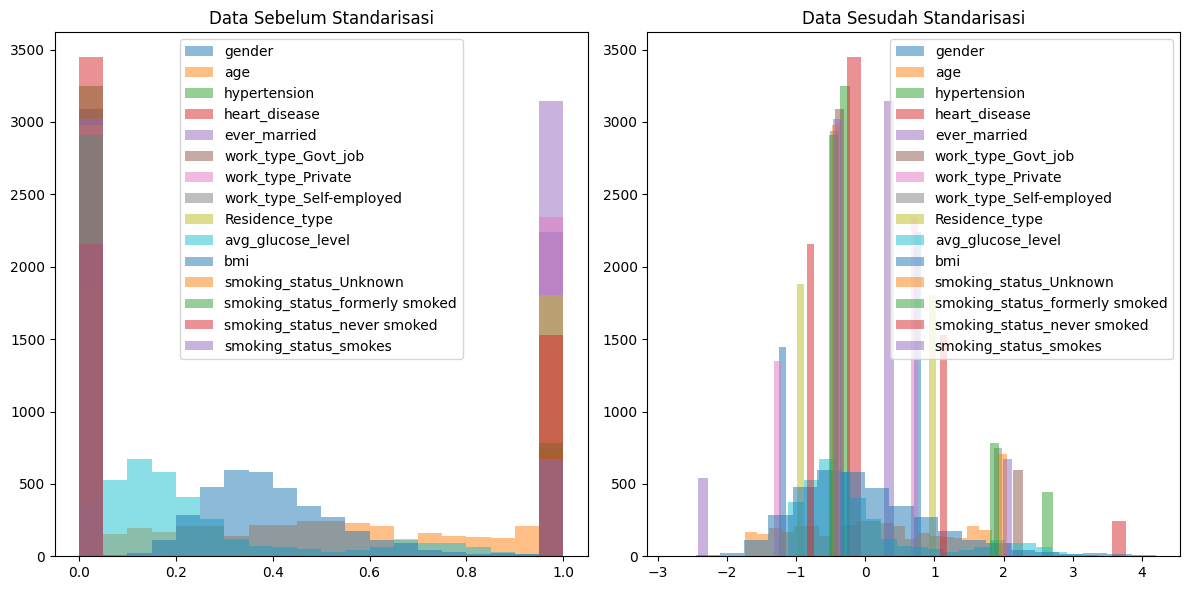

In [28]:
# Drop label target (misalnya, 'stroke') dari DataFrame
df_features = df.drop('stroke', axis=1)

# Standarisasi data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

# Plot perbandingan data sebelum dan sesudah standarisasi
plt.figure(figsize=(12, 6))

# Plot data sebelum standarisasi
plt.subplot(1, 2, 1)
plt.title("Data Sebelum Standarisasi")
for column in df_features.columns:
    plt.hist(df_features[column], bins=20, alpha=0.5, label=column)
plt.legend()

# Plot data sesudah standarisasi
plt.subplot(1, 2, 2)
plt.title("Data Sesudah Standarisasi")
for column in df_scaled.columns:
    plt.hist(df_scaled[column], bins=20, alpha=0.5, label=column)
plt.legend()

plt.tight_layout()
plt.show()


In [29]:
# Tampilkan matriks kovarians
cov_matrix = np.cov(df_scaled, rowvar=False)
print("Matriks Kovarians:")
print(cov_matrix)

Matriks Kovarians:
[[ 1.00027115e+00 -5.64518657e-02 -4.04041182e-02 -1.05595922e-01
  -3.17200045e-02  3.86335741e-03 -1.35499904e-02  1.26748474e-02
  -2.01855823e-03 -7.08886838e-02 -2.71127018e-02 -6.04824585e-03
  -6.96545807e-02  9.21531595e-02 -3.77322922e-02]
 [-5.64518657e-02  1.00027115e+00  2.33524915e-01  2.60580842e-01
   2.58471018e-01 -1.38090894e-02 -2.12455905e-01  2.66850430e-01
  -1.04039650e-02  2.11795588e-01 -4.78669398e-02 -2.96611680e-02
   1.50643749e-01 -2.30801678e-02 -9.99111914e-02]
 [-4.04041182e-02  2.33524915e-01  1.00027115e+00  9.78166532e-02
   5.38615723e-02 -1.05342945e-02 -5.98001827e-02  8.11979537e-02
   6.23455978e-04  1.70394928e-01  9.98142918e-02 -9.08070227e-02
   3.33078286e-02  5.05110769e-02 -7.09602322e-03]
 [-1.05595922e-01  2.60580842e-01  9.78166532e-02  1.00027115e+00
   2.62833858e-02 -1.85105980e-02 -3.31383067e-02  5.66010114e-02
   5.24570710e-03  1.46182901e-01 -1.29914093e-02 -2.90478072e-02
   5.01100100e-02 -4.29134753e-02  3


Varian Setiap Variabel:
[1.00027115 1.00027115 1.00027115 1.00027115 1.00027115 1.00027115
 1.00027115 1.00027115 1.00027115 1.00027115 1.00027115 1.00027115
 1.00027115 1.00027115 1.00027115]

Kovarians Antar Variabel:
[[ 0.00000000e+00 -5.64518657e-02 -4.04041182e-02 -1.05595922e-01
  -3.17200045e-02  3.86335741e-03 -1.35499904e-02  1.26748474e-02
  -2.01855823e-03 -7.08886838e-02 -2.71127018e-02 -6.04824585e-03
  -6.96545807e-02  9.21531595e-02 -3.77322922e-02]
 [-5.64518657e-02  0.00000000e+00  2.33524915e-01  2.60580842e-01
   2.58471018e-01 -1.38090894e-02 -2.12455905e-01  2.66850430e-01
  -1.04039650e-02  2.11795588e-01 -4.78669398e-02 -2.96611680e-02
   1.50643749e-01 -2.30801678e-02 -9.99111914e-02]
 [-4.04041182e-02  2.33524915e-01  0.00000000e+00  9.78166532e-02
   5.38615723e-02 -1.05342945e-02 -5.98001827e-02  8.11979537e-02
   6.23455978e-04  1.70394928e-01  9.98142918e-02 -9.08070227e-02
   3.33078286e-02  5.05110769e-02 -7.09602322e-03]
 [-1.05595922e-01  2.60580842e-0

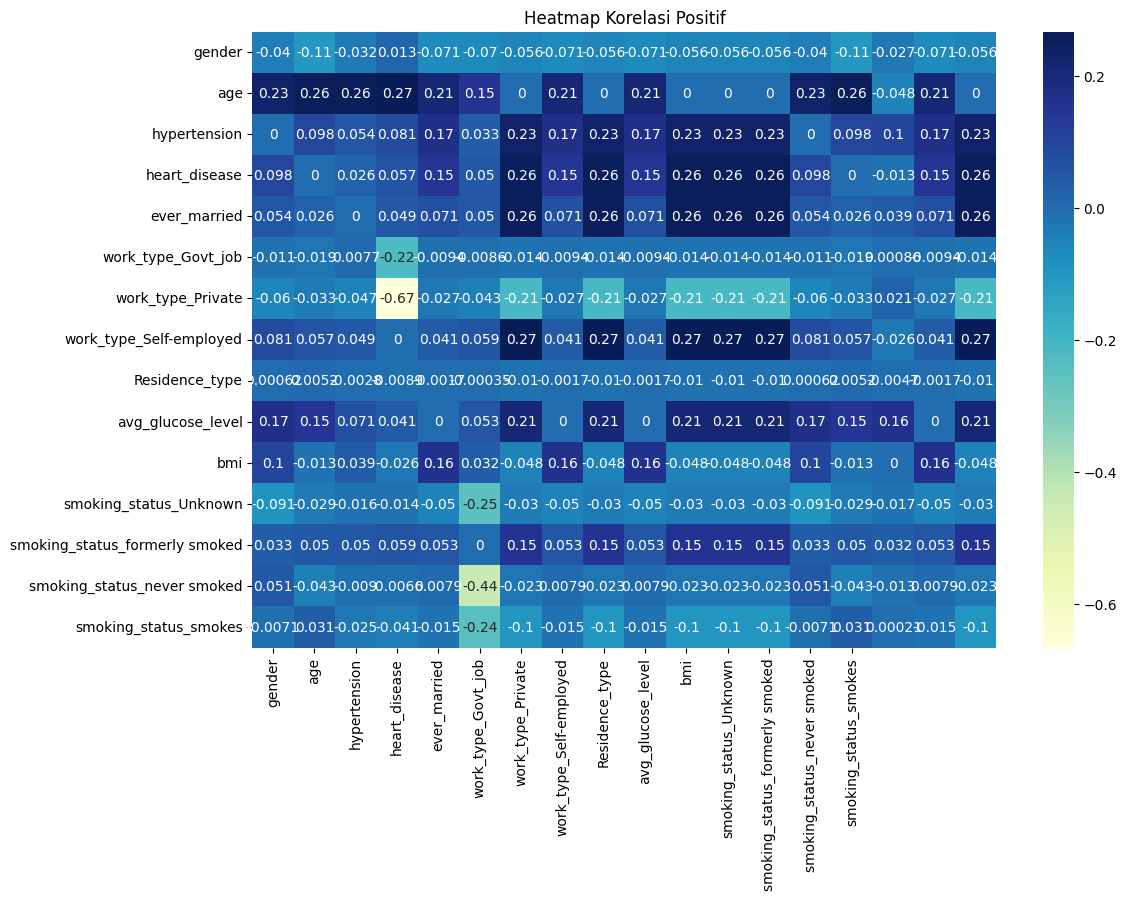

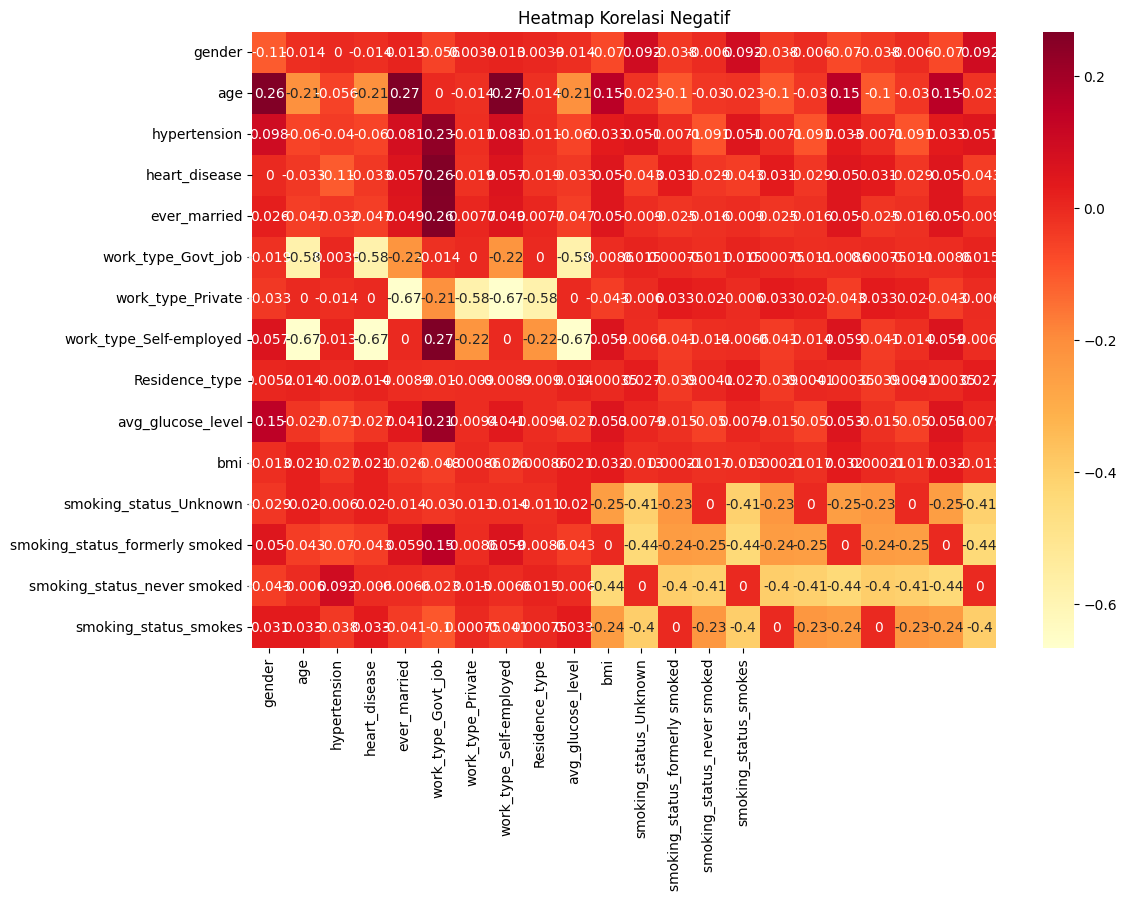

In [30]:
column_names = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
                'Residence_type', 'avg_glucose_level', 'bmi',
                'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
threshold = 0.1
# Tampilkan elemen diagonal utama (varian)
variances = np.diag(cov_matrix)
print("\nVarian Setiap Variabel:")
print(variances)

# Tampilkan elemen non-diagonal (kovarians)
covariances = cov_matrix - np.diag(variances)
print("\nKovarians Antar Variabel:")
print(covariances)

# Temukan kolom-kolom dengan korelasi positif dan negatif
positive_correlation_indices = np.where(covariances > threshold)
negative_correlation_indices = np.where(covariances < -threshold)

# Tampilkan hasil
print("\nKolom dengan Korelasi Positif:")
for i, j in zip(positive_correlation_indices[0], positive_correlation_indices[1]):
    print(f"{column_names[i]} dan {column_names[j]}")

print("\nKolom dengan Korelasi Negatif:")
for i, j in zip(negative_correlation_indices[0], negative_correlation_indices[1]):
    print(f"{column_names[i]} dan {column_names[j]}")

# Plot korelasi positif
plt.figure(figsize=(12, 8))
plt.title("Heatmap Korelasi Positif")
sns.heatmap(covariances[:, positive_correlation_indices[1]], annot=True, xticklabels=column_names, yticklabels=column_names, cmap="YlGnBu")
plt.show()

# Plot korelasi negatif
plt.figure(figsize=(12, 8))
plt.title("Heatmap Korelasi Negatif")
sns.heatmap(covariances[:, negative_correlation_indices[1]], annot=True, xticklabels=column_names, yticklabels=column_names, cmap="YlOrRd")
plt.show()

In [31]:
# Hitung eigenvalues dan eigenvectors
pca = PCA()
pca.fit(df_scaled)
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Tampilkan eigenvalues beserta nama kolom
print("\nEigenvalues:")
for col, value in zip(df.columns, eigenvalues):
    print(f"{col}: {round(value, 4)}")

# Tampilkan eigenvectors beserta nama kolom
print("\nEigenvectors:")
for i, vector in enumerate(eigenvectors):
    print(f"Principal Component {i + 1}:")
    for col, value in zip(df.columns, vector):
        print(f"   {col}: {round(value, 4)}")


# # Plot Eigenvectors
# plt.figure(figsize=(12, 8))
# for i, vector in enumerate(eigenvectors):
#     plt.plot(df.columns[:-1], vector, label=f'Principal Component {i + 1}')

# plt.title('Eigenvectors Plot')
# plt.xlabel('Feature')
# plt.ylabel('Eigenvector Value')
# plt.xticks(rotation=45, ha='right')  # Rotasi nama kolom untuk memastikan terlihat dengan baik
# plt.legend()
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()


Eigenvalues:
gender: 2.0754
age: 1.6046
hypertension: 1.5222
heart_disease: 1.2821
ever_married: 1.1997
work_type_Govt_job: 1.1755
work_type_Private: 1.0642
work_type_Self-employed: 1.0087
Residence_type: 0.9804
avg_glucose_level: 0.9241
bmi: 0.8485
smoking_status_Unknown: 0.7686
smoking_status_formerly smoked: 0.55
smoking_status_never smoked: 0.0
smoking_status_smokes: 0.0

Eigenvectors:
Principal Component 1:
   gender: -0.0774
   age: 0.4624
   hypertension: 0.2488
   heart_disease: 0.226
   ever_married: 0.2064
   work_type_Govt_job: 0.1684
   work_type_Private: -0.5162
   work_type_Self-employed: 0.4634
   Residence_type: -0.014
   avg_glucose_level: 0.2295
   bmi: 0.0309
   smoking_status_Unknown: -0.0889
   smoking_status_formerly smoked: 0.2088
   smoking_status_never smoked: -0.0283
   smoking_status_smokes: -0.0943
Principal Component 2:
   gender: -0.2506
   age: 0.1886
   hypertension: 0.1462
   heart_disease: 0.2519
   ever_married: 0.1326
   work_type_Govt_job: -0.3839


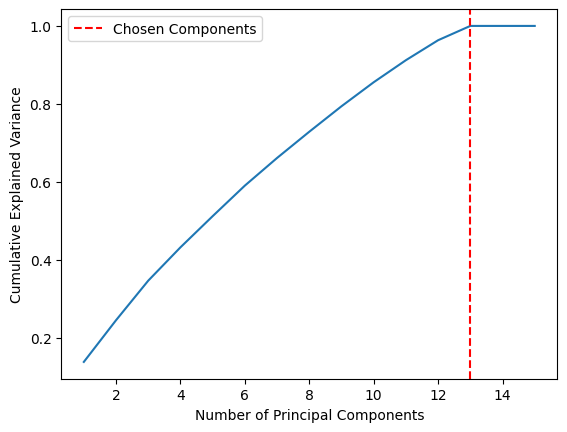

In [32]:
# Plotting cumulative explained variance
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

# Tambahkan garis putus-putus pada nilai 13 pada sumbu x
plt.axvline(x=13, color='r', linestyle='--', label='Chosen Components')

plt.legend()
plt.show()

In [33]:
# Lakukan PCA
n_components = 13  # Ganti dengan jumlah komponen utama yang diinginkan
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(df_scaled)


In [34]:
# Tampilkan explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Tampilkan hasil penjumlahan explained variance ratio (kumulatif)
cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print("\nCumulative Explained Variance Ratio:")
print(cumulative_explained_variance_ratio)

# Tampilkan komponen utama
print("\nPrincipal Components:")
print(pca.components_)

# Kolom Tambahan: Tampilkan kontribusi variabel terhadap komponen utama
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Komponen {i + 1} ({df.columns[i]}) - Proporsi Varians: {ratio:.4f}")

Explained Variance Ratio:
[0.13832541 0.10694676 0.10145287 0.08544819 0.0799552  0.07834859
 0.0709279  0.06722665 0.06534259 0.06158671 0.05655396 0.05122944
 0.03665572]

Cumulative Explained Variance Ratio:
[0.13832541 0.24527218 0.34672505 0.43217324 0.51212844 0.59047704
 0.66140493 0.72863158 0.79397417 0.85556088 0.91211484 0.96334428
 1.        ]

Principal Components:
[[-7.73722569e-02  4.62415437e-01  2.48804945e-01  2.26032519e-01
   2.06449202e-01  1.68392988e-01 -5.16188535e-01  4.63419871e-01
  -1.39501347e-02  2.29513356e-01  3.08705779e-02 -8.88883836e-02
   2.08760620e-01 -2.83254182e-02 -9.43207089e-02]
 [-2.50556753e-01  1.88625214e-01  1.46174631e-01  2.51872695e-01
   1.32585252e-01 -3.83864937e-01  4.21790562e-01 -1.53156900e-01
  -1.54143592e-02  2.42636449e-01  1.37632950e-01  6.60584680e-02
   3.51730667e-01 -4.68395493e-01  1.58158506e-01]
 [ 3.88900474e-02  1.43096103e-01  2.71771493e-01  1.04678033e-01
   1.02734879e-01 -2.68906913e-01  2.92663525e-01 -1.03

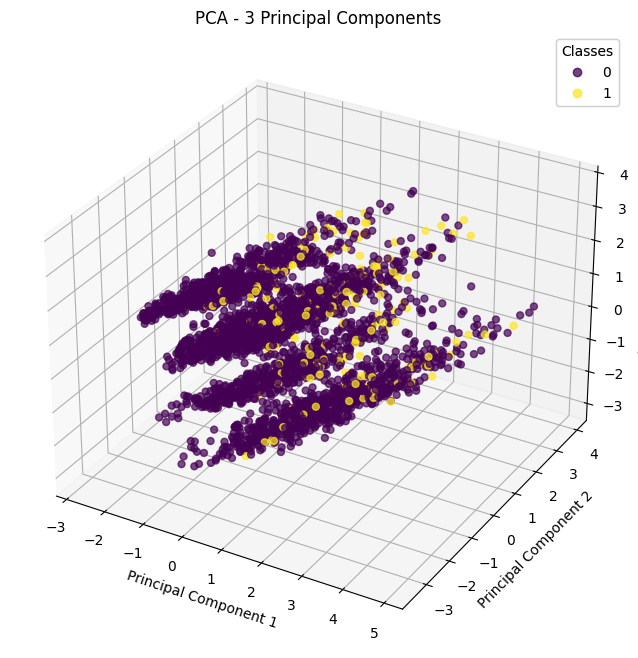

In [35]:
from mpl_toolkits.mplot3d import Axes3D

# Buat DataFrame hasil PCA
df_pca_result = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(13)])
df_pca_result['stroke'] = y  # Tambahkan kolom target ke hasil PCA

# Simpan hasil PCA ke file CSV
df_pca_result.to_csv('data_setelah_pca.csv', index=False)

# Copy file CSV ke direktori tujuan (misalnya, 'D:/Tugas Akhir/Stroke/')
shutil.copy('data_setelah_pca.csv', 'D:/Tugas Akhir/Stroke/data_setelah_pca.csv')

# Plot hasil PCA 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_pca_result['PC1'], df_pca_result['PC2'], df_pca_result['PC3'], c=df_pca_result['stroke'], cmap='viridis', marker='o', s=25, alpha=0.7)

# Tambahkan legenda untuk kelas
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

# Tambahkan label dan judul
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA - 3 Principal Components')
plt.show()


In [36]:
df_pca_result

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,stroke
0,1.775227,3.696141,0.951096,0.666589,0.984671,0.423779,-1.052184,0.353209,1.838321,0.255492,-2.423542,0.334970,-0.802179,1
1,0.954359,1.309967,2.139833,-0.049233,-0.476155,0.908153,-2.661388,1.240274,0.217512,-0.248330,-1.594871,1.879672,0.451075,1
2,-0.854628,1.170992,-0.197016,1.676321,-1.186733,0.118974,0.908565,-1.270314,-0.277434,0.558625,-0.884359,-0.866033,0.036976,1
3,3.129217,-0.865756,1.952353,-0.673912,-1.280950,0.073046,0.420579,0.491172,-0.900217,1.028056,1.630759,-1.096979,-0.283953,1
4,1.031916,2.479782,0.306803,-0.161165,1.269974,-0.641404,-0.426414,-0.826129,0.814760,-0.561967,-0.268789,-1.509066,0.978141,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,-0.963403,-0.847207,1.260652,-0.881316,-0.198432,-0.606853,-1.242883,-0.130743,-1.067030,0.418629,0.068368,-0.210667,0.207548,0
3685,2.288183,-1.188393,1.049289,-0.634308,-0.887265,-0.128457,1.510867,-0.973493,0.264603,-0.370979,-1.046515,0.340292,1.188271,0
3686,0.687317,-2.160770,0.379303,-0.863442,-0.823403,-0.885805,0.840085,0.651322,-0.982935,-0.510031,-0.561269,0.363918,-1.136041,0
3687,0.026379,1.927374,-0.002677,-0.263507,1.466158,-0.970811,-0.652862,0.724919,-0.519667,-0.669517,-0.096553,-1.433688,-0.464568,0


In [37]:
# Hitung jumlah data untuk target stroke 0 dan 1
class_counts_pca = df_pca_result['stroke'].value_counts()
# Cetak jumlah data untuk target stroke 0 dan 1
print(f'Jumlah data untuk target stroke 0: {class_counts_pca[0]}')
print(f'Jumlah data untuk target stroke 1: {class_counts_pca[1]}')

Jumlah data untuk target stroke 0: 3481
Jumlah data untuk target stroke 1: 208


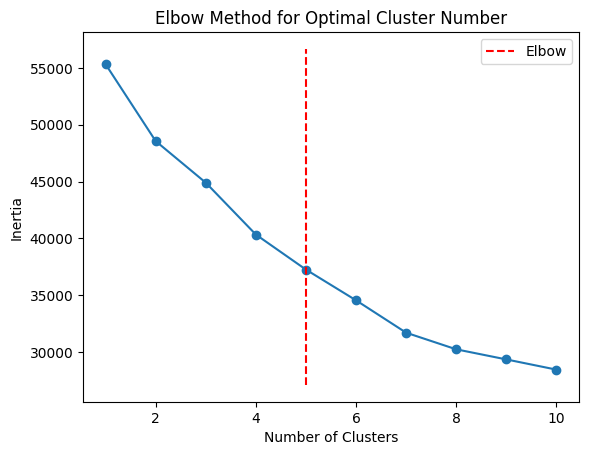

Jumlah kluster optimal (elbow): 5


In [41]:
import numpy as np
from kneed import KneeLocator

# Range jumlah cluster yang akan diuji
range_clusters = range(1, 11)  # Misalnya, uji dari 1 hingga 10 clusters

# Simpan inersia untuk setiap jumlah cluster
inertia = []

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Gunakan KneeLocator untuk menemukan elbow secara otomatis
kl = KneeLocator(range_clusters, inertia, curve="convex", direction="decreasing")

# Plot Elbow Method dan tandai titik elbow
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.vlines(kl.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label='Elbow')
plt.legend()
plt.show()

# Tampilkan jumlah kluster optimal
print(f"Jumlah kluster optimal (elbow): {kl.elbow}")


In [44]:
from sklearn import metrics
n_clusters = 5

# Range n_init yang akan diuji
range_n_init = [10, 20, 30, 40, 50]

# Simpan metrik evaluasi untuk setiap n_init
evaluation_metrics = {}

for n_init in range_n_init:
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=42)  
    cluster_labels = kmeans.fit_predict(X_pca)
    
    # Hitung dan simpan metrik evaluasi, misalnya, silhouette score
    silhouette_score = metrics.silhouette_score(X_pca, cluster_labels)
    evaluation_metrics[n_init] = silhouette_score

# Cetak hasil evaluasi untuk melihat sejauh mana hasil klastering konsisten
print("Evaluation Metrics:")
for n_init, score in evaluation_metrics.items():
    print(f"n_init={n_init}: Silhouette Score={score}")


Evaluation Metrics:
n_init=10: Silhouette Score=0.17004598941891952
n_init=20: Silhouette Score=0.17004598941891952
n_init=30: Silhouette Score=0.21006736962726408
n_init=40: Silhouette Score=0.21006736962726408
n_init=50: Silhouette Score=0.21006736962726408


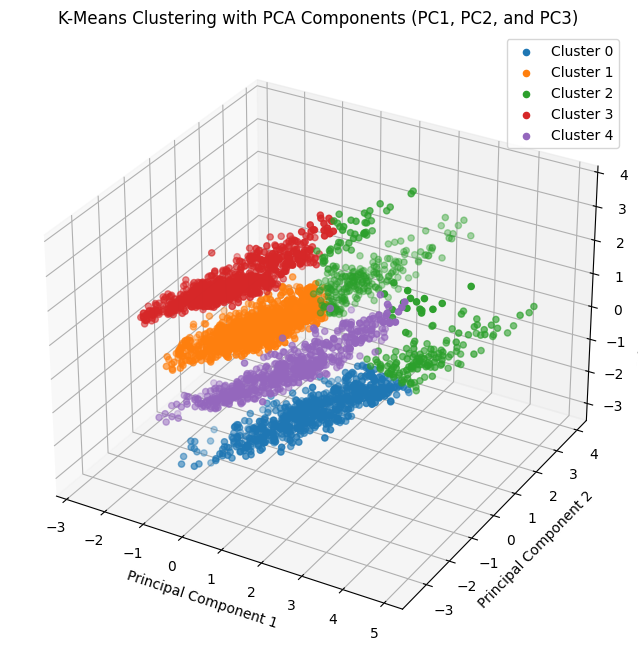

'D:/Tugas Akhir/Stroke/data_hasil_pca_kmeans.csv'

In [48]:
# Bagian 2: K-Means
# Pilih fitur hasil PCA (dalam contoh ini, ambil 12 komponen utama)
X_pca_kmeans = df_pca_result[['PC1', 'PC2', 'PC3']].values

# Inisialisasi model K-Means dengan jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=5, n_init=30, random_state=42)  # Sesuaikan n_clusters dan n_init sesuai kebutuhan

# Menentukan label cluster untuk setiap data hasil PCA
cluster_labels_kmeans = kmeans.fit_predict(X_pca_kmeans)

# Menyatukan label klaster ke dalam dataset hasil PCA
df_pca_result['Cluster_KMeans'] = cluster_labels_kmeans

# Simpan hasil PCA+KMeans ke dalam file CSV
result_csv_path_kmeans = 'data_hasil_pca_kmeans.csv'
df_pca_result.to_csv(result_csv_path_kmeans, index=False)

# Visualisasi hasil klastering K-Means dalam 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot klaster
for cluster in range(5):  # Sesuaikan dengan jumlah klaster yang diinginkan
    cluster_data = df_pca_result[df_pca_result["Cluster_KMeans"] == cluster]
    ax.scatter(cluster_data["PC1"], cluster_data["PC2"], cluster_data["PC3"], label=f'Cluster {cluster}')

# Tambahkan label dan judul
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('K-Means Clustering with PCA Components (PC1, PC2, and PC3)')
plt.legend()
plt.show()

# Copy file CSV hasil PCA+KMeans ke lokasi yang diinginkan
destination_path_kmeans = 'D:/Tugas Akhir/Stroke/data_hasil_pca_kmeans.csv'
shutil.copy(result_csv_path_kmeans, destination_path_kmeans)


In [40]:
# Hitung jumlah data untuk target stroke 0 dan 1 setelah klastering
class_counts_kmeans = df_pca_result['stroke'].value_counts()

# Cetak jumlah data untuk target stroke 0 dan 1 setelah klastering
print(f'Jumlah data untuk target stroke 0: {class_counts_kmeans[0]}')
print(f'Jumlah data untuk target stroke 1: {class_counts_kmeans[1]}')

Jumlah data untuk target stroke 0: 2785
Jumlah data untuk target stroke 1: 166


In [41]:
df_pca_result

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,stroke,Cluster
0,-2.198446,-0.063510,-1.192988,-1.109112,0.167293,0.786710,1.884859,1.509660,1.180102,0.930168,-0.047606,0.481924,0,1
1,0.501471,-2.404745,0.219513,-0.417288,-1.102771,-1.507345,1.025323,0.016208,2.216121,0.066350,-0.370321,0.049518,0,3
2,1.083668,2.620710,0.703105,2.160946,-2.375013,1.323544,-0.857171,-0.684283,0.752723,2.550280,0.319692,0.629398,0,2
3,-0.247241,-1.329118,-2.464115,3.071307,-0.044224,0.151414,-0.434488,0.265685,1.785355,-0.413881,0.332409,-0.275782,0,3
4,1.805303,-0.731781,-1.548763,-2.293295,-1.293945,0.535155,0.880438,-1.105553,-0.137119,-0.111340,-0.104875,0.438179,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,-1.952590,-1.371194,1.024585,-0.665853,-0.137952,-0.700225,-1.237221,0.545046,-0.781203,0.529987,0.313661,-0.169904,0,1
2947,-0.128931,2.250908,-0.061848,0.171030,2.067678,-0.769228,1.224746,0.906017,-0.684985,-1.370362,-0.560595,1.095589,0,2
2948,-0.075061,0.387784,2.031212,0.167241,0.055444,0.605549,0.870904,-1.363046,0.015574,0.268290,-1.312108,-1.169314,0,1
2949,-0.499856,1.704297,-0.323368,-0.221844,1.635599,-1.092425,-0.358677,0.940899,-0.421327,-0.850362,-0.052091,-0.146877,0,2


In [42]:
# Langkah 2: Pisahkan fitur dan label
X = df_pca_result[['PC1', 'PC2', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12',]]
y = df_pca_result['stroke']  # Menggunakan stroke sebagai target karena kita ingin undersampling pada hasil klasifikasi stroke

In [43]:
# Langkah 3: Terapkan Random UnderSampler pada kelas mayoritas
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Tampilkan hasil undersampling
print("Jumlah Data Setelah Undersampling:")
print(pd.Series(y_resampled).value_counts())

Jumlah Data Setelah Undersampling:
stroke
0    166
1    166
Name: count, dtype: int64


In [44]:
# Tampilkan beberapa contoh data setelah undersampling
undersampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['stroke'])], axis=1)
print("\nBeberapa Contoh Data Setelah Undersampling:")
print(undersampled_data['stroke'].value_counts())


Beberapa Contoh Data Setelah Undersampling:
stroke
0    166
1    166
Name: count, dtype: int64


In [45]:
# Tentukan path untuk menyimpan file CSV hasil undersampling
output_csv_path = 'data_setelah_undersampling.csv'
# Simpan DataFrame ke file CSV
undersampled_data.to_csv(output_csv_path, index=False, float_format='%.4f', decimal=',')

# Pindahkan file CSV ke lokasi yang diinginkan (contoh: folder 'output')
# Pindahkan file ke direktori yang diinginkan
shutil.copy(output_csv_path, 'D:\Tugas Akhir\Stroke\data_setelah_undersampling.csv'.format(output_csv_path))

'D:\\Tugas Akhir\\Stroke\\data_setelah_undersampling.csv'